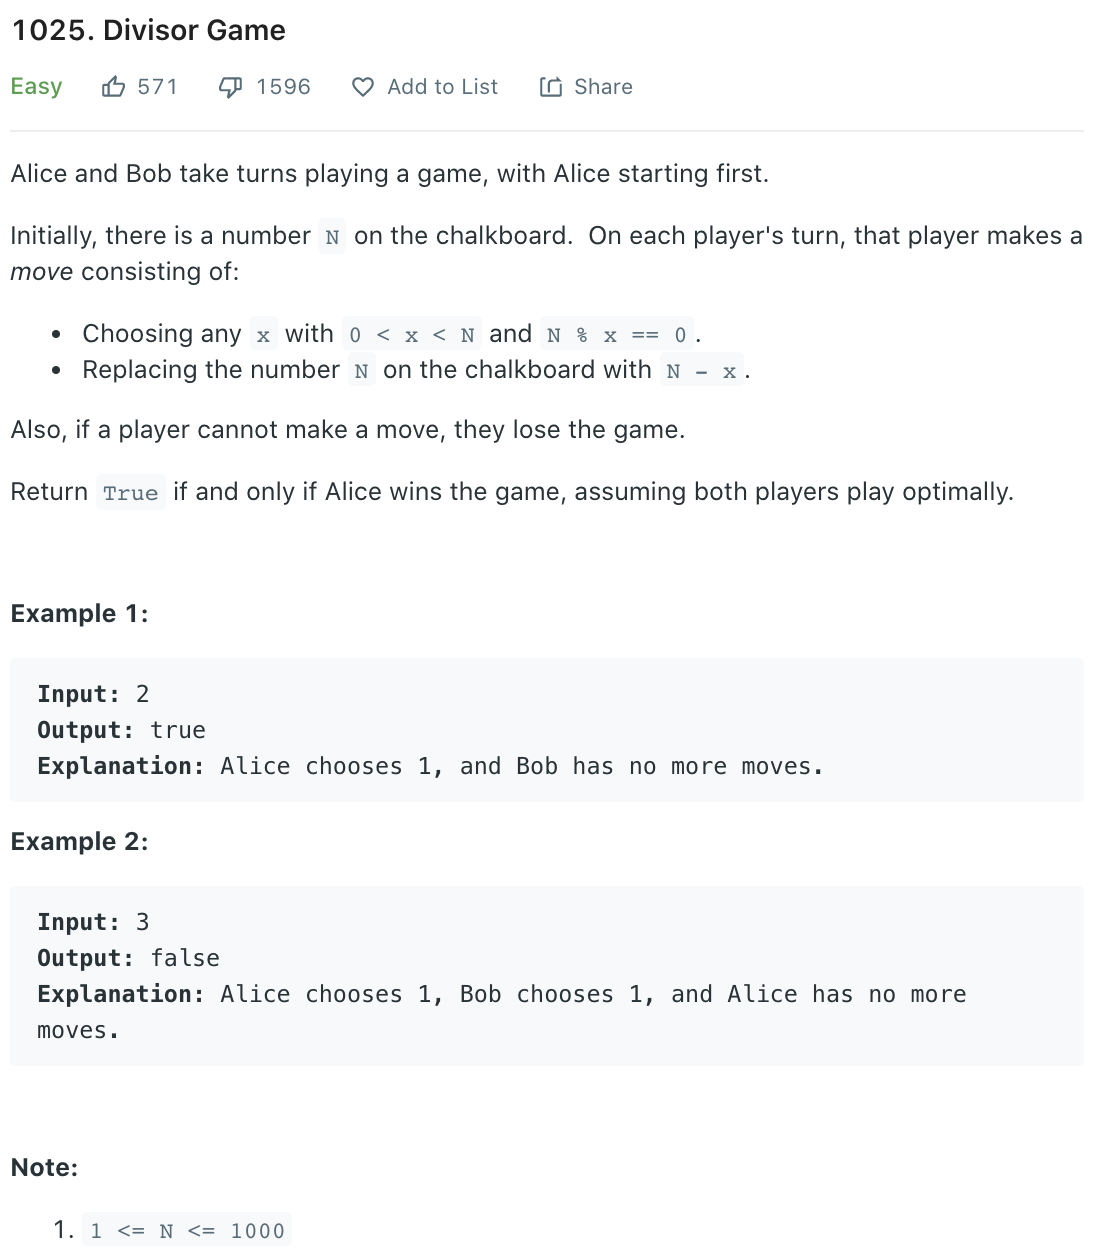

In [1]:
from IPython.display import Image, Video
Image("divisor_1.png",width=900,height=500)

## Math

In [2]:
class Solution:
    def divisorGame(self, N: int) -> bool:
        return N % 2 == 0

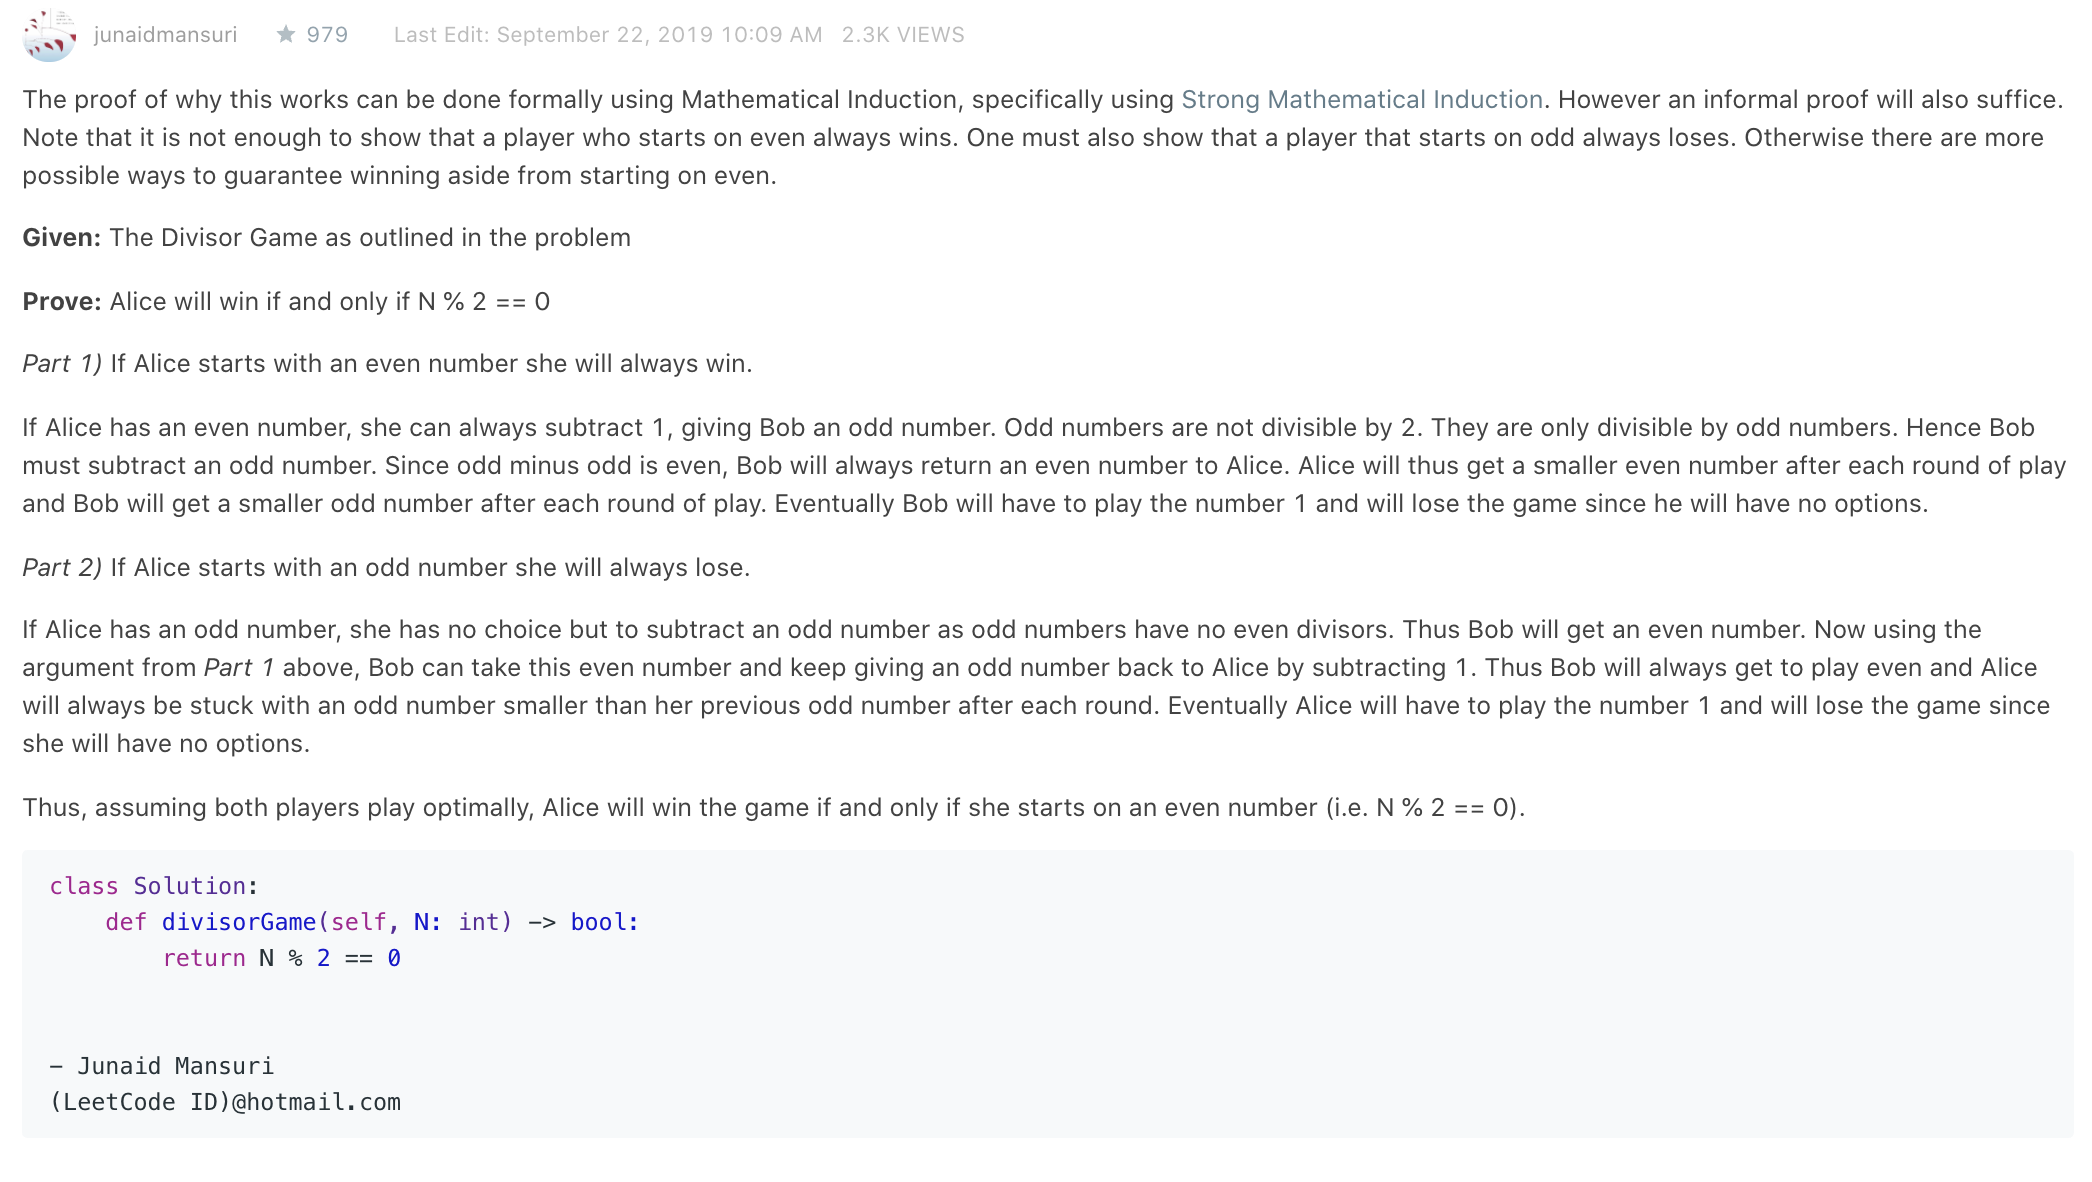

In [3]:
Image("divisor_2.png",width=900,height=500)

## Recursive

In [6]:
class Solution:
    def divisorGame(self, N):
        return self.solve(N)
    
    def solve(self, N):
        if N <= 1:
            return False
        
        for i in range(1, N//2+1):
            if N % i == 0:
                if not self.solve(N-i):
                    return True
        return False

## Dynamic Programming

In [5]:
class Solution:
    def divisorGame(self, N):
        return self.solve(N, cache = [None] * (N+1))
    
    def solve(self, N, cache):
        if N <= 1:
            return False
        
        if cache[N] != None:
            return cache[N]
        
        for i in range(1, N//2+1):
            if N % i == 0:
                if not self.solve(N-i, cache):
                    cache[i] = True
                    return True
        cache[N] = False
        return False

In [4]:
class Solution:
    def divisorGame(self, N: int) -> bool:
        dict_bool = {} # This our memoization table
        
        def ways(num, player):
            if num == 1 and player=='B': # No move left for Bob
                return True
            if num == 1 and player=='A':  # No move left for Alice
                return False
            
            if num in dict_bool: # Check whether num is already in dict_bool
                return
            
            # Flipping players each turn 'A' - Alice, 'B' - Bob
            if player == 'A':
                player = 'B'
            else:
                player = 'A'
                
            # Get divisors
            to_check = []
            for i in range(1, (num//2)+1):
                if num % i == 0:
                    to_check.append(num-i)
            
            for check in to_check: # Start branching off for each divisor
                dict_bool[num] = ways(check, player)
                # ^---- Memoize the reults there

        ways(N, 'A')
        return any(dict_bool.values()) # Return True if there is any way that Alice can win (since they are palying optimally)